# Advection Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, LinearRegression, SGDRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF
import time

from scipy import io
from matplotlib import cm

from RF import *

In [2]:
# Write a function to get the training and test samples

def get_data(filename):
    '''
    Read data samples from file.
    
    Input:
    filename.
    
    Returns:
    u0: initial condition (training inputs)
    ut: solution at time t=0.5 (training outputs)
    xt: location x and time t
    '''
    
    # x grid
    nx = 40
    # time grid
    nt = 40
    # load data
    data = np.load(filename)
    # location x, time t, and solution u
    x = data["x"].astype(np.float64)
    t = data["t"].astype(np.float64)
    u = data["u"].astype(np.float64)  # N x nt x nx
    
    # initial condition u0
    u0 = u[:, 0, :]  # N x nx
    # location x and time t
    xt = np.vstack((np.ravel(x), np.ravel(t))).T
    
    return u0, u[:, int(nt/2), :], xt

## Advection equation 1

In [3]:
# read training data and test data
x_train, y_train, xt= get_data("train_AD1.npz")
x_test, y_test, xt = get_data("test_AD1.npz")

# check the shapes of training and test sets 
x_train.shape, y_train.shape, xt.shape, x_test.shape, y_test.shape, xt.shape

((1000, 40), (1000, 40), (1600, 2), (1000, 40), (1000, 40), (1600, 2))

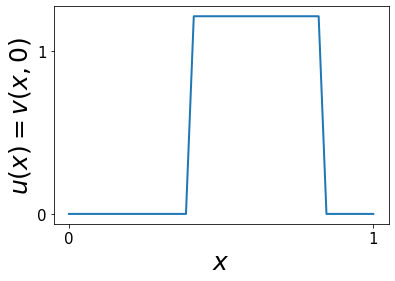

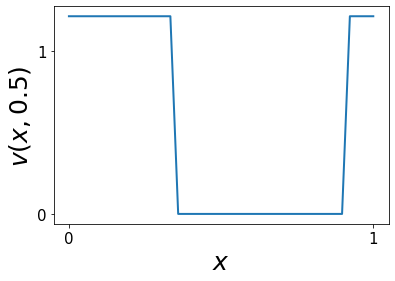

In [13]:
# Visualize one training inputs
idx = 20
grid = np.linspace(0,1,40)

# one example of training input
plt.figure(1)
plt.plot(grid, x_train[idx], linewidth=2)
plt.xlabel(r'$x$', size=25)
plt.ylabel(r'$u(x) = v(x,0)$', size=25)
plt.xticks([0,1], fontsize=15)
plt.yticks([0,1], fontsize=15)
plt.savefig('AD1_input.pdf', bbox_inches = 'tight')

# one example of training output
plt.figure(2)
plt.plot(grid, y_train[idx], linewidth=2)
plt.xlabel(r'$x$', size=25)
plt.ylabel(r'$v(x,0.5)$', size=25)
plt.xticks([0,1], fontsize=15)
plt.yticks([0,1], fontsize=15)
plt.savefig('AD1_output.pdf', bbox_inches = 'tight')

In [5]:
########################## Matern Random Feature Model:
# number of features
N = 5000
# scaling parameter gamma
gamma = 1e-4
# 
nv = 3/2
# generate random feature matrix
x_train_RF, x_test_RF = RF_student(nv, gamma, N, x_train, x_test)
# train a linear regression model
model = Ridge(alpha=1e-10, fit_intercept=False)
start = time.time()
model.fit(x_train_RF, y_train)
pred = model.predict(x_test_RF)
end = time.time()
# report relative prediction error and clock time
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
print(f'Test error of Cauchy random feature model is {e:.2e}.\n')
print(f'Clock time is {end-start:.2f} seconds')

Test error of Cauchy random feature model is 2.84e-04.

Clock time is 0.08 seconds


In [54]:
########################## Cauchy Random Feature Model:
# number of features
N = 5000
# scaling parameter gamma
gamma = 1e-5
# generate random feature matrix
x_train_RF, x_test_RF = RF_Cauchy(gamma, N, x_train, x_test)
# train a linear regression model
model = Ridge(alpha=1e-15)
start = time.time()
model.fit(x_train_RF, y_train)
pred = model.predict(x_test_RF)
end = time.time()
# report relative prediction error and clock time
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
print(f'Test error of Cauchy random feature model is {e:.2e}.\n')
print(f'Clock time is {end-start:.2f} seconds')

Test error of Cauchy random feature model is 2.55e-06.

Clock time is 0.09 seconds


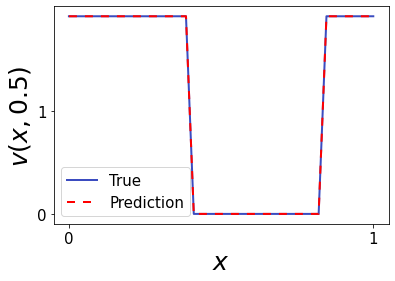

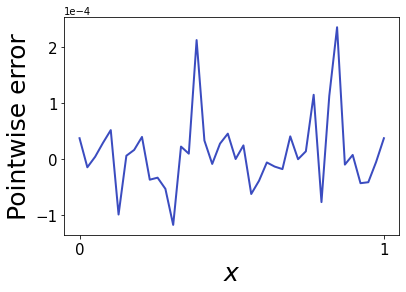

In [8]:
# visualize the result
idx = 20
grid = np.linspace(0,1, 40)

# Figure 1: test + prediction
plt.figure(1)
plt.plot(grid, y_test[idx],  label = "True",  linewidth=2.0, color= cm.coolwarm(0.0))
plt.plot(grid, pred[idx],  label = "Prediction", linestyle='--',dashes=(4, 4), color = 'red',  linewidth=2.0)
plt.xlabel(r'$x$', size= 25)
plt.ylabel(r'$v(x, 0.5)$', size= 25)
plt.xticks([0,1], fontsize=15)
plt.yticks([0,1], fontsize=15)
#plt.title("Prediction on one test example", size = 15)
plt.legend(fontsize=15)
plt.savefig('AD1test_pred.pdf', bbox_inches = 'tight')

# Figure 2: pointwise error (Prediction - test)
plt.figure(2)
plt.plot(grid, pred[idx]-y_test[idx],linewidth=2.0, color= cm.coolwarm(0.0))
plt.xlabel(r'$x$', size= 25)
plt.ylabel('Pointwise error', size= 25)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xticks([0,1], fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(axis='both', labelsize=15)
#plt.title("Prediction on the test set", size = 15)
#plt.legend()
plt.savefig('AD1error.pdf', bbox_inches = 'tight')

In [55]:
################################## Gaussian Random Feature Model:
# number of features
N = 5000
# scaling parameter gamma
gamma = 1e-5
# generate random feature matrix
x_train_RF, x_test_RF = RF_Gaussian(gamma, N, x_train, x_test)
# train a linear regression model
model = Ridge(alpha=1e-12)
start = time.time()
model.fit(x_train_RF, y_train)
pred = model.predict(x_test_RF)
end = time.time()
# report relative prediction error and clock time
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
print(f'Test error of Cauchy random feature model is {e:.2e}.\n')
print(f'Clock time is {end-start:.2f} seconds')

Test error of Cauchy random feature model is 4.62e-06.

Clock time is 0.08 seconds


#### Kernel method

In [56]:
##################### RBF kernel
bandwidth = 1
kernel = RBF(length_scale = bandwidth)
model = GaussianProcessRegressor(kernel, alpha = 1e-10)

start = time.time()
model.fit(x_train, y_train)
end = time.time()

pred = model.predict(x_test)
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
print(f'Test error of Cauchy random feature model is {e:.2e}.\n')
print(f'Clock time is {end-start:.2f} seconds')

Test error of Cauchy random feature model is 2.08e-05.

Clock time is 3.71 seconds


In [57]:
##################### Matern kernel
kernel = Matern(nu = 2.5, length_scale = 2)
model = GaussianProcessRegressor(kernel, alpha = 1e-10) 

start = time.time()
model.fit(x_train, y_train)
end = time.time()
pred = model.predict(x_test)

e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

print(f'Error is {e:.2e}. \n')
print(f'Computation time is {end-start:.2f} seconds')

Error is 3.19e-05. 

Computation time is 2.55 seconds


## Advection equation 2

In [29]:
# read training data and test data
x_train, y_train, xt= get_data("train_AD2.npz")
x_test, y_test, xt = get_data("test_AD2.npz")

# check the shapes of training and test sets 
x_train.shape, y_train.shape, xt.shape, x_test.shape, y_test.shape, xt.shape

((1000, 40), (1000, 40), (1600, 2), (1000, 40), (1000, 40), (1600, 2))

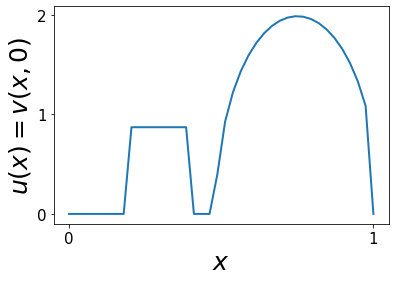

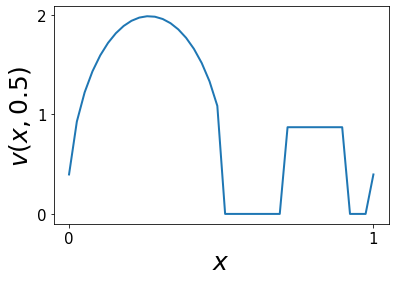

In [30]:
# Visualize one training inputs
idx = 20
grid = np.linspace(0,1,40)

plt.figure(1)
# training input
plt.plot(grid, x_train[idx], linewidth=2)
plt.xlabel(r'$x$', size=25)
plt.ylabel(r'$u(x) = v(x,0)$', size=25)
plt.xticks([0,1], fontsize=15)
plt.yticks([0,1,2], fontsize=15)
plt.savefig('AD2_input.pdf', bbox_inches = 'tight')

plt.figure(2)
# training output
plt.plot(grid, y_train[idx], linewidth=2)
plt.xlabel(r'$x$', size=25)
plt.ylabel(r'$v(x,0.5)$', size=25)
plt.xticks([0,1], fontsize=15)
plt.yticks([0,1,2], fontsize=15)
plt.savefig('AD2_output.pdf', bbox_inches = 'tight')

In [31]:
############################ Cauchy random feature
# number of features
N = 5000
# scaling parameter gamma
gamma = 1e-5
# generate random feature matrix
x_train_RF, x_test_RF = RF_Cauchy(gamma, N, x_train, x_test)
# train a linear regression model
model = Ridge(alpha=1e-15)
start = time.time()
model.fit(x_train_RF, y_train)
pred = model.predict(x_test_RF)
end = time.time()
# report relative prediction error and clock time
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
print(f'Test error of Cauchy random feature model is {e:.2e}.\n')
print(f'Clock time is {end-start:.2f} seconds')

Test error of Cauchy random feature model is 1.88e-06.

Clock time is 0.08 seconds


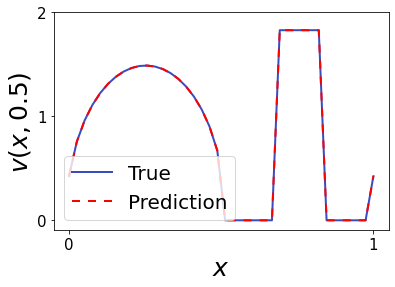

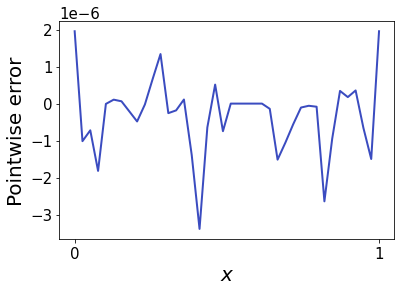

In [36]:
# visualize the result
idx = 20
grid = np.linspace(0,1, 40)

# Figure 1: test + prediction
plt.figure(1)
plt.plot(grid, y_test[idx],  label = "True",  linewidth=2.0, color= cm.coolwarm(0.0))
plt.plot(grid, pred[idx],  label = "Prediction", linestyle='--',dashes=(4, 4), color = 'red',  linewidth=2.0)
plt.xlabel(r'$x$', size= 25)
plt.ylabel(r'$v(x, 0.5)$', size= 25)
plt.xticks([0,1], fontsize=15)
plt.yticks([0,1,2], fontsize=15)
plt.legend(loc='lower left',fontsize=20)
plt.savefig('AD2test_pred.pdf', bbox_inches = 'tight')

# Figure 4: pointwise error (Prediction - test)
plt.figure(4)
plt.plot(grid, pred[idx]-y_test[idx],linewidth=2.0, color= cm.coolwarm(0.0))
plt.xlabel(r'$x$', size= 20)
plt.ylabel('Pointwise error', size= 20)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xticks([0,1], fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(axis='both', labelsize=15)
plt.savefig('AD2error.pdf', bbox_inches = 'tight')

In [63]:
######################## Gaussian random feature
# number of features
N = 5000
# scaling parameter gamma
gamma = 1e-5
# generate random feature matrix
x_train_RF, x_test_RF = RF_Gaussian(gamma, N, x_train, x_test)
# train a linear regression model
model = Ridge(alpha=1e-12)
start = time.time()
model.fit(x_train_RF, y_train)
pred = model.predict(x_test_RF)
end = time.time()
# report relative prediction error and clock time
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
print(f'Test error of Cauchy random feature model is {e:.2e}.\n')
print(f'Clock time is {end-start:.2f} seconds')

Test error of Cauchy random feature model is 6.30e-06.

Clock time is 0.08 seconds


In [64]:
##################### RBF kernel
bandwidth = 1
kernel = RBF(length_scale = bandwidth)
model = GaussianProcessRegressor(kernel, alpha = 1e-10)

start = time.time()
model.fit(x_train, y_train)
end = time.time()

pred = model.predict(x_test)
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
print(f'Test error of Cauchy random feature model is {e:.2e}.\n')
print(f'Clock time is {end-start:.2f} seconds')

Test error of Cauchy random feature model is 4.21e-05.

Clock time is 2.94 seconds


In [65]:
##################### Matern kernel
kernel = Matern(nu = 2.5, length_scale = 2)
model = GaussianProcessRegressor(kernel, alpha = 1e-10) 

start = time.time()
model.fit(x_train, y_train)
end = time.time()
pred = model.predict(x_test)

e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

print(f'Error is {e:.2e}. \n')
print(f'Computation time is {end-start:.2f} seconds')

Error is 4.07e-05. 

Computation time is 4.54 seconds


## Advection equation 3

In [37]:
def get_data(file_name_input, file_name_output, mode="partial"):
    """
    Read training and test samples
    """
    
    # training and test inputs 
    X = np.load(file_name_input)
    X = X.T
    m = X.shape[0]
    
    # training and test outputs 
    Y = np.load(file_name_output)
    Y = Y.T
    n = Y.shape[0]
    
    if mode == "full":
        
        return X[0:int(m/2)], Y[0:int(n/2)], X[int(m/2):], Y[int(n/2):]
    
    else:
        
        return X[0: 1000], Y[0:1000], X[1000:2000], Y[1000:2000]

In [38]:
x_train, y_train, x_test, y_test = get_data("AD3_inputs.npy", "AD3_outputs.npy")
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1000, 200), (1000, 200), (1000, 200), (1000, 200))

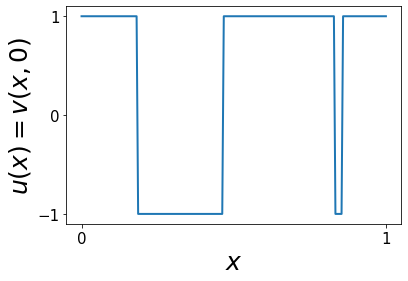

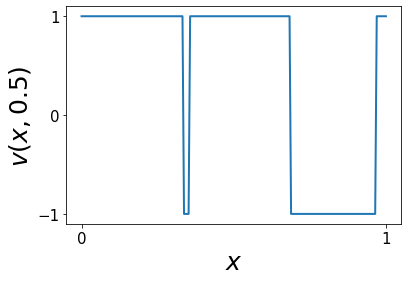

In [41]:
# Visualize one training inputs
idx = 1
grid = np.linspace(0,1,200)

plt.figure(1)
# training input
plt.plot(grid, x_train[idx], linewidth=2)
plt.xlabel(r'$x$', size=25)
plt.ylabel(r'$u(x) = v(x,0)$', size=25)
plt.xticks([0,1], fontsize=15)
plt.yticks([-1,0,1], fontsize=15)
plt.savefig('AD3_input.pdf', bbox_inches = 'tight')

plt.figure(2)
# training output
plt.plot(grid, y_train[idx], linewidth=2)
plt.xlabel(r'$x$', size=25)
plt.ylabel(r'$v(x,0.5)$', size=25)
plt.xticks([0,1], fontsize=15)
plt.yticks([-1,0,1], fontsize=15)
plt.savefig('AD3_output.pdf', bbox_inches = 'tight')

In [42]:
############################ Cauchy random feature
# number of features
N = 3000
# scaling parameter gamma
gamma = 1e-6
# generate random feature matrix
x_train_RF, x_test_RF = RF_Cauchy(gamma, N, x_train, x_test)
# train a linear regression model
model = Ridge(alpha=1e-15)
start = time.time()
model.fit(x_train_RF, y_train)
pred = model.predict(x_test_RF)
end = time.time()
# report relative prediction error and clock time
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
print(f'Test error of Cauchy random feature model is {e:.2e}.\n')
print(f'Clock time is {end-start:.2f} seconds')

Test error of Cauchy random feature model is 1.41e-01.

Clock time is 0.08 seconds


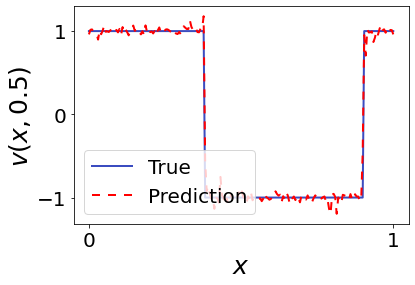

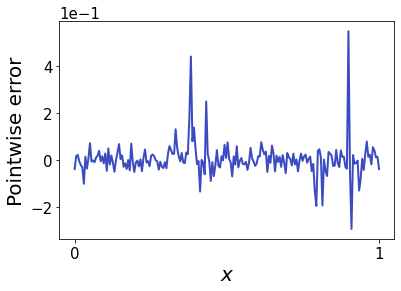

In [53]:
# visualize the result
idx = 4
grid = np.linspace(0,1, 200)

# Figure 1: test + prediction
plt.figure(1)
plt.plot(grid, y_test[idx],  label = "True",  linewidth=2.0, color= cm.coolwarm(0.0))
plt.plot(grid, pred[idx],  label = "Prediction", linestyle='--',dashes=(4, 4), color = 'red',  linewidth=2.0)
plt.xlabel(r'$x$', size= 25)
plt.ylabel(r'$v(x, 0.5)$', size= 25)
plt.xticks([0,1], fontsize=20)
plt.yticks([-1,0,1], fontsize=20)
plt.legend(loc="lower left", fontsize=20)
plt.savefig('AD3test_pred.pdf', bbox_inches = 'tight')

# Figure 2: pointwise error (Prediction - test)
plt.figure(2)
plt.plot(grid, pred[idx]-y_test[idx],linewidth=2.0, color= cm.coolwarm(0.0))
plt.xlabel(r'$x$', size= 20)
plt.ylabel('Pointwise error', size=20)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xticks([0,1], fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.savefig('AD3error.pdf', bbox_inches = 'tight')

In [75]:
######################## Gaussian random feature
# number of features
N = 5000
# scaling parameter gamma
gamma = 1e-2
# generate random feature matrix
x_train_RF, x_test_RF = RF_Gaussian(gamma, N, x_train, x_test)
# train a linear regression model
model = Ridge(alpha=1e-9)
start = time.time()
model.fit(x_train_RF, y_train)
pred = model.predict(x_test_RF)
end = time.time()
# report relative prediction error and clock time
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
print(f'Test error of Cauchy random feature model is {e:.2e}.\n')
print(f'Clock time is {end-start:.2f} seconds')

Test error of Cauchy random feature model is 2.11e-01.

Clock time is 0.11 seconds


In [24]:
##################### RBF kernel
bandwidth = 1
kernel = RBF(length_scale = bandwidth)
model = GaussianProcessRegressor(kernel, alpha = 1e-10)

start = time.time()
model.fit(x_train, y_train)
end = time.time()

pred = model.predict(x_test)
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
print(f'Test error of Cauchy random feature model is {e:.2e}.\n')
print(f'Clock time is {end-start:.2f} seconds')

Test error of Cauchy random feature model is 1.73e-01.

Clock time is 51.51 seconds


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [25]:
##################### Matern kernel
kernel = Matern(nu = 2.5, length_scale = 2)
model = GaussianProcessRegressor(kernel, alpha = 1e-10) 

start = time.time()
model.fit(x_train, y_train)
end = time.time()
pred = model.predict(x_test)

e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

print(f'Error is {e:.2e}. \n')
print(f'Computation time is {end-start:.2f} seconds')

Error is 5.44e-01. 

Computation time is 21.93 seconds


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
